# TP1 - Análisis con enfoque a la columna 'keyword'

> #### importación general de librerías y de visualización (matplotlib y seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set (style = 'darkgrid')

> #### Leemos el dataFrame

In [3]:
df = pd.read_csv('../train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


> #### Vemos la cantidad de registros y caracteristicas generales de las columnas numericas

In [4]:
df.shape

(7613, 5)

In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


> #### Nos enfocamos en la columna 'keyword'
* Vemos la cantidad de nulos de esta columna
* Los primeros 30 valores
* La cantidad de valores distintos que obtiene esta columna

In [6]:
df.keyword.isna().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [7]:
df.keyword.unique()[:30]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging'],
      dtype=object)

In [8]:
df.keyword.unique().size

222

> #### Procedemos a crearnos un dataFrame aparte con este universo
> * <i>Nos sacamos de encima los nulos, el cual vimos anteriormente que eran sólo 61 items</i>
> * <i>Corregimos algunos datos, observando previamente la presencia del caracter '%20' el cual representa un espacio</i>

In [23]:
dfK = df.dropna(subset=['keyword']).copy()
dfK.shape

(7552, 5)

In [26]:
dfK['keyword'] = dfK['keyword'].apply(lambda x: x.replace('%20', ' '))
dfK.keyword.unique()[:30]

array(['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags'],
      dtype=object)

> #### Creamos un gráfico para ver las 30 primeras 'keyword' por cantidad de Tweets

Text(0, 0.5, 'Keyword')

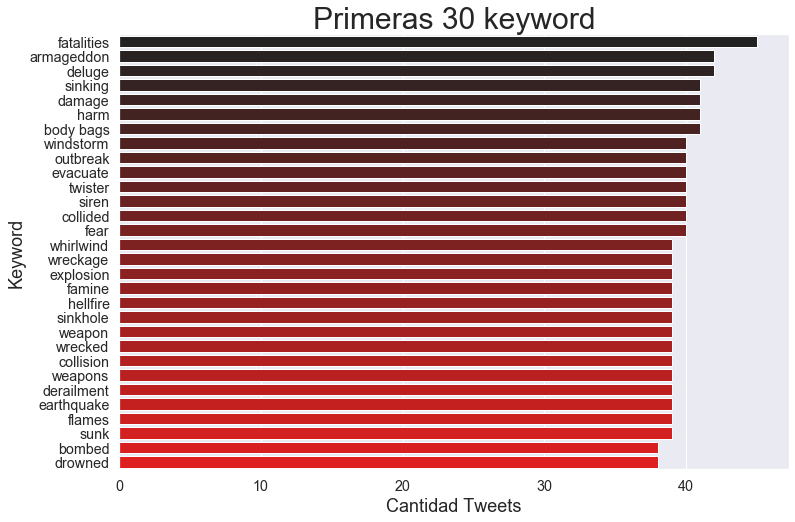

In [57]:
#s = dfK.keyword.value_counts()
s = dfK.keyword.value_counts().head(30)
p = pd.DataFrame({'keyword': s.index, 'cant': s.values })

plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.3)
g = sns.barplot(x='cant', y='keyword', data=p, orient="h", palette=sns.dark_palette("red", 30))
g.set_title("Primeras 30 keyword", fontsize=30)
g.set_xlabel("Cantidad Tweets", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)
#show_values_on_bars(g, "h")


In [15]:
dfK.where(dfK.target == 1).dropna(how='all').keyword.value_counts().head(10)

wreckage           39
derailment         39
outbreak           39
typhoon            37
debris             37
oil spill          37
suicide bomb       32
suicide bombing    32
rescuers           32
evacuated          32
Name: keyword, dtype: int64

In [16]:
dfK.where(dfK.target == 0).dropna(how='all').keyword.value_counts().head(10)

body bags     40
harm          37
armageddon    37
ruin          36
deluge        36
wrecked       36
explode       35
twister       35
siren         35
fear          35
Name: keyword, dtype: int64